In [ ]:
%%capture
!pip install pybbn

In [ ]:
%%capture
!apt install libgraphviz-dev -y
!pip install pygraphviz

In [ ]:
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

In [ ]:
burglary = BbnNode(Variable(0, 'burglary', ['B', '!B']), [.001, .999])
earthquake = BbnNode(Variable(1, 'earthquake', ['E', '!E']), [.002, .998])
alarm = BbnNode(Variable(2, 'alarm', ['A', '!A']), [.95, .05, .94, .06, .29, .71, .001, .999])
john_calls = BbnNode(Variable(3, 'john_calls', ['J', '!J']), [.9, .1, .01, .99])
may_calls = BbnNode(Variable(4, 'may_calls', ['M', '!M']), [.7, .3, .01, .99])

bbn = Bbn() \
  .add_node(burglary) \
  .add_node(earthquake) \
  .add_node(alarm) \
  .add_node(john_calls) \
  .add_node(may_calls) \
  .add_edge(Edge(burglary, alarm, EdgeType.DIRECTED)) \
  .add_edge(Edge(earthquake, alarm, EdgeType.DIRECTED)) \
  .add_edge(Edge(alarm, john_calls, EdgeType.DIRECTED)) \
  .add_edge(Edge(alarm, may_calls, EdgeType.DIRECTED))

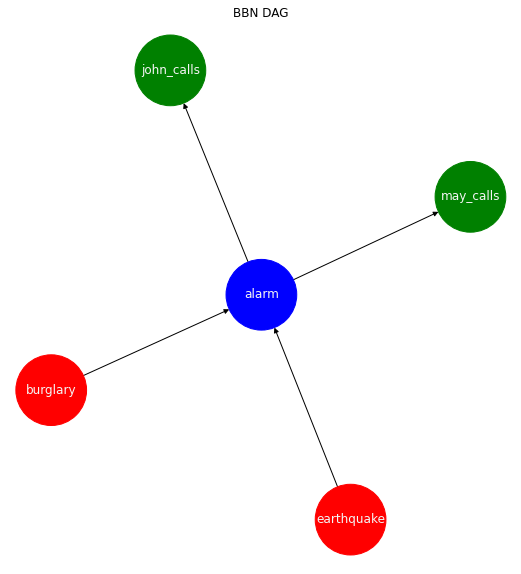

In [ ]:
%matplotlib inline
from pybbn.generator.bbngenerator import convert_for_drawing
import matplotlib.pyplot as plt
import networkx as nx
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    graph = convert_for_drawing(bbn)
    pos = nx.nx_agraph.graphviz_layout(graph, prog='neato')

    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    labels = dict([(k, node.variable.name) for k, node in bbn.nodes.items()])
    nx.draw(graph, pos=pos, with_labels=True, labels=labels, node_size=5e3,
            node_color=['r','r','b','g','g'], font_color='whitesmoke')
    plt.title('BBN DAG')
    plt.show()

In [ ]:
# convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)

# insert an observation evidence
ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name('burglary')) \
    .with_evidence('B', 1.0) \
    .build()

join_tree.set_observation(ev)

# print the marginal probabilities
for node in join_tree.get_bbn_nodes():
    potential = join_tree.get_bbn_potential(node)
    print(node)
    print(potential)
    print('--------------------->')

2|alarm|A,!A
2=A|0.94002
2=!A|0.05998
--------------------->
3|john_calls|J,!J
3=J|0.84662
3=!J|0.15338
--------------------->
4|may_calls|M,!M
4=M|0.65861
4=!M|0.34139
--------------------->
1|earthquake|E,!E
1=E|0.00200
1=!E|0.99800
--------------------->
0|burglary|B,!B
0=B|1.00000
0=!B|0.00000
--------------------->
